## ATC2 10xscRNA-seq dataset

Droplet-based single-cell RNA-seq data (scRNA-seq) on an anaplastic thyroid cancer sample (ATC2), covering 6,224 cells. 

This sample was initially analyzed by [CopyKAT](https://www.nature.com/articles/s41587-020-00795-2), and also analyzed by [Numbat](https://www.nature.com/articles/s41587-022-01468-y).

Download the notebook by clicking on the [Download ATC2 10xscRNA-seq demo Notebook](https://github.com/Rongtingting/xclone-data/tree/main/examples/ATC2_XClone_demo.ipynb).

In [6]:
import xclone
import anndata as an
import pandas as pd
import numpy as np
import scipy
scipy.__version__
xclone.pp.efficiency_preview()

(Running XClone 0.3.5)
2023-08-06 17:34:42
[XClone efficiency] multiprocessing cpu total count in your device 88


In [7]:
## load data
### rdr
RDR_adata = xclone.data.atc2_rdr()

### baf
BAF_adata = xclone.data.atc2_baf()

load the ATC2 rdr data from downloaded file.


In [10]:
dataset_name = "ATC2"
out_dir = "/groups/cgsd/rthuang/Results/ATC2/demoresults/"

RDR 
Configurations:
HMM_brk                        chr_arm
KNN_neighbors                  10
WMA_smooth_key                 chr_arm
WMA_window_size                40
_file_format_data              h5ad
_file_format_figs              pdf
_frameon                       True
_outdir                        /groups/cgsd/rthuang/Results/ATC2/demoresults
_plot_suffix                   
_start                         1691343304.83893
_vector_friendly               True
cell_anno_key                  copykat.pred
dataset_name                   ATC2
dispersion_celltype            None
exclude_XY                     False
file_format_data               h5ad
file_format_figs               pdf
filter_ref_ave                 0.5
fit_GLM_libratio               False
gene_exp_group                 1
gene_exp_ref_log               True
guide_chr_anno_key             chr_arm
guide_cnv_ratio                None
guide_qt_lst                   [0.0001, 0.96, 0.99]
marker_group_anno_key          copykat.pr

Trying to set attribute `.var` of view, copying.


output anndata is not sparse matrix.


Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.


[XClone RDR gene dispersion fitting] Time used: 115 seconds
[XClone RDR gene-specific dispersion]: checking
max_value: inf
min_value: 2.241898524132354e-60
qt_0.95_value: 3.8658293574309663
qt_0.05_value: 0.18710548460162385
remove no GLM results genes num: 0
remove inf dispersion genes num: 1
[XClone RDR dispersion]: clipping
[XClone RDR gene-specific dispersion]: checking
max_value: 3.0184753211727373
min_value: 0.16002931485194138
qt_0.95_value: 3.0184753211727373
qt_0.05_value: 0.1870402550681242
[XClone hint] RDR_base_file and bulk_file saved in /groups/cgsd/rthuang/Results/ATC2/demoresults/data/.
make WMA connectivities matrix, saved in varp[WMA_connect].
[XClone] RDR CNV states chrs guiding(copy loss, copy neutral, copy gain): ['6p', '3p', '19q']
CNV loss:  0.552244917699188
CNV neutral:  1.137963191522954
CNV gain:  1.415679783538026
[XClone] RDR CNV states ratio guiding(copy loss, copy neutral, copy gain): [0.55224492 1.13796319 1.41567978]
expression_brk [-0.69298327  6.13891

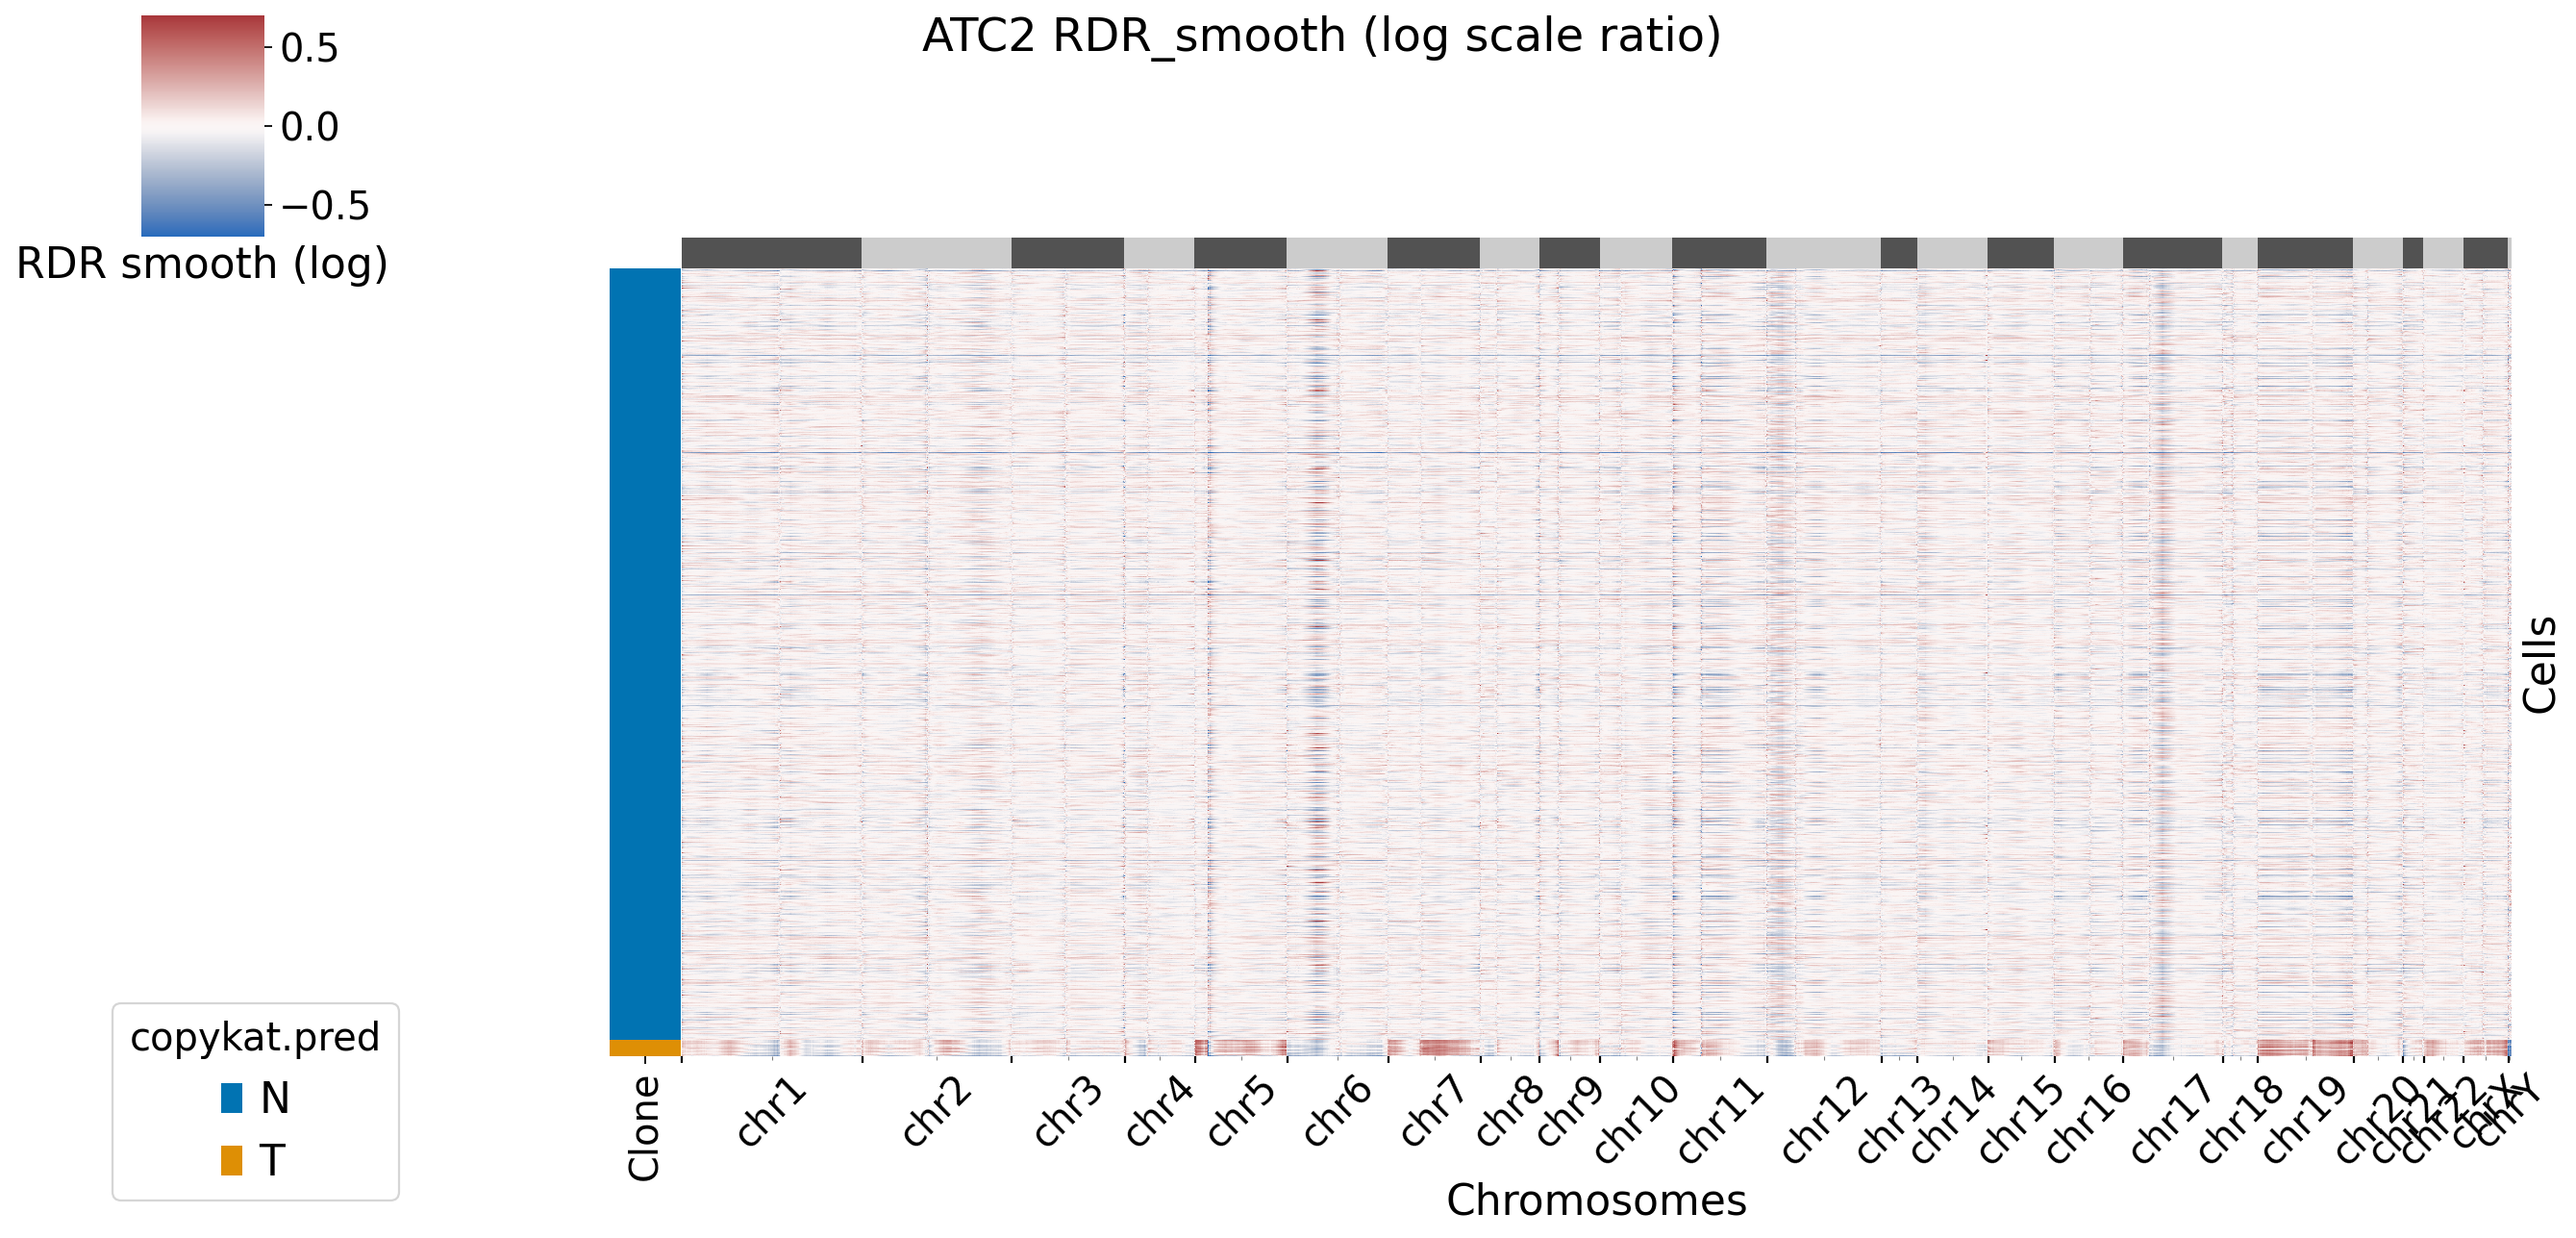

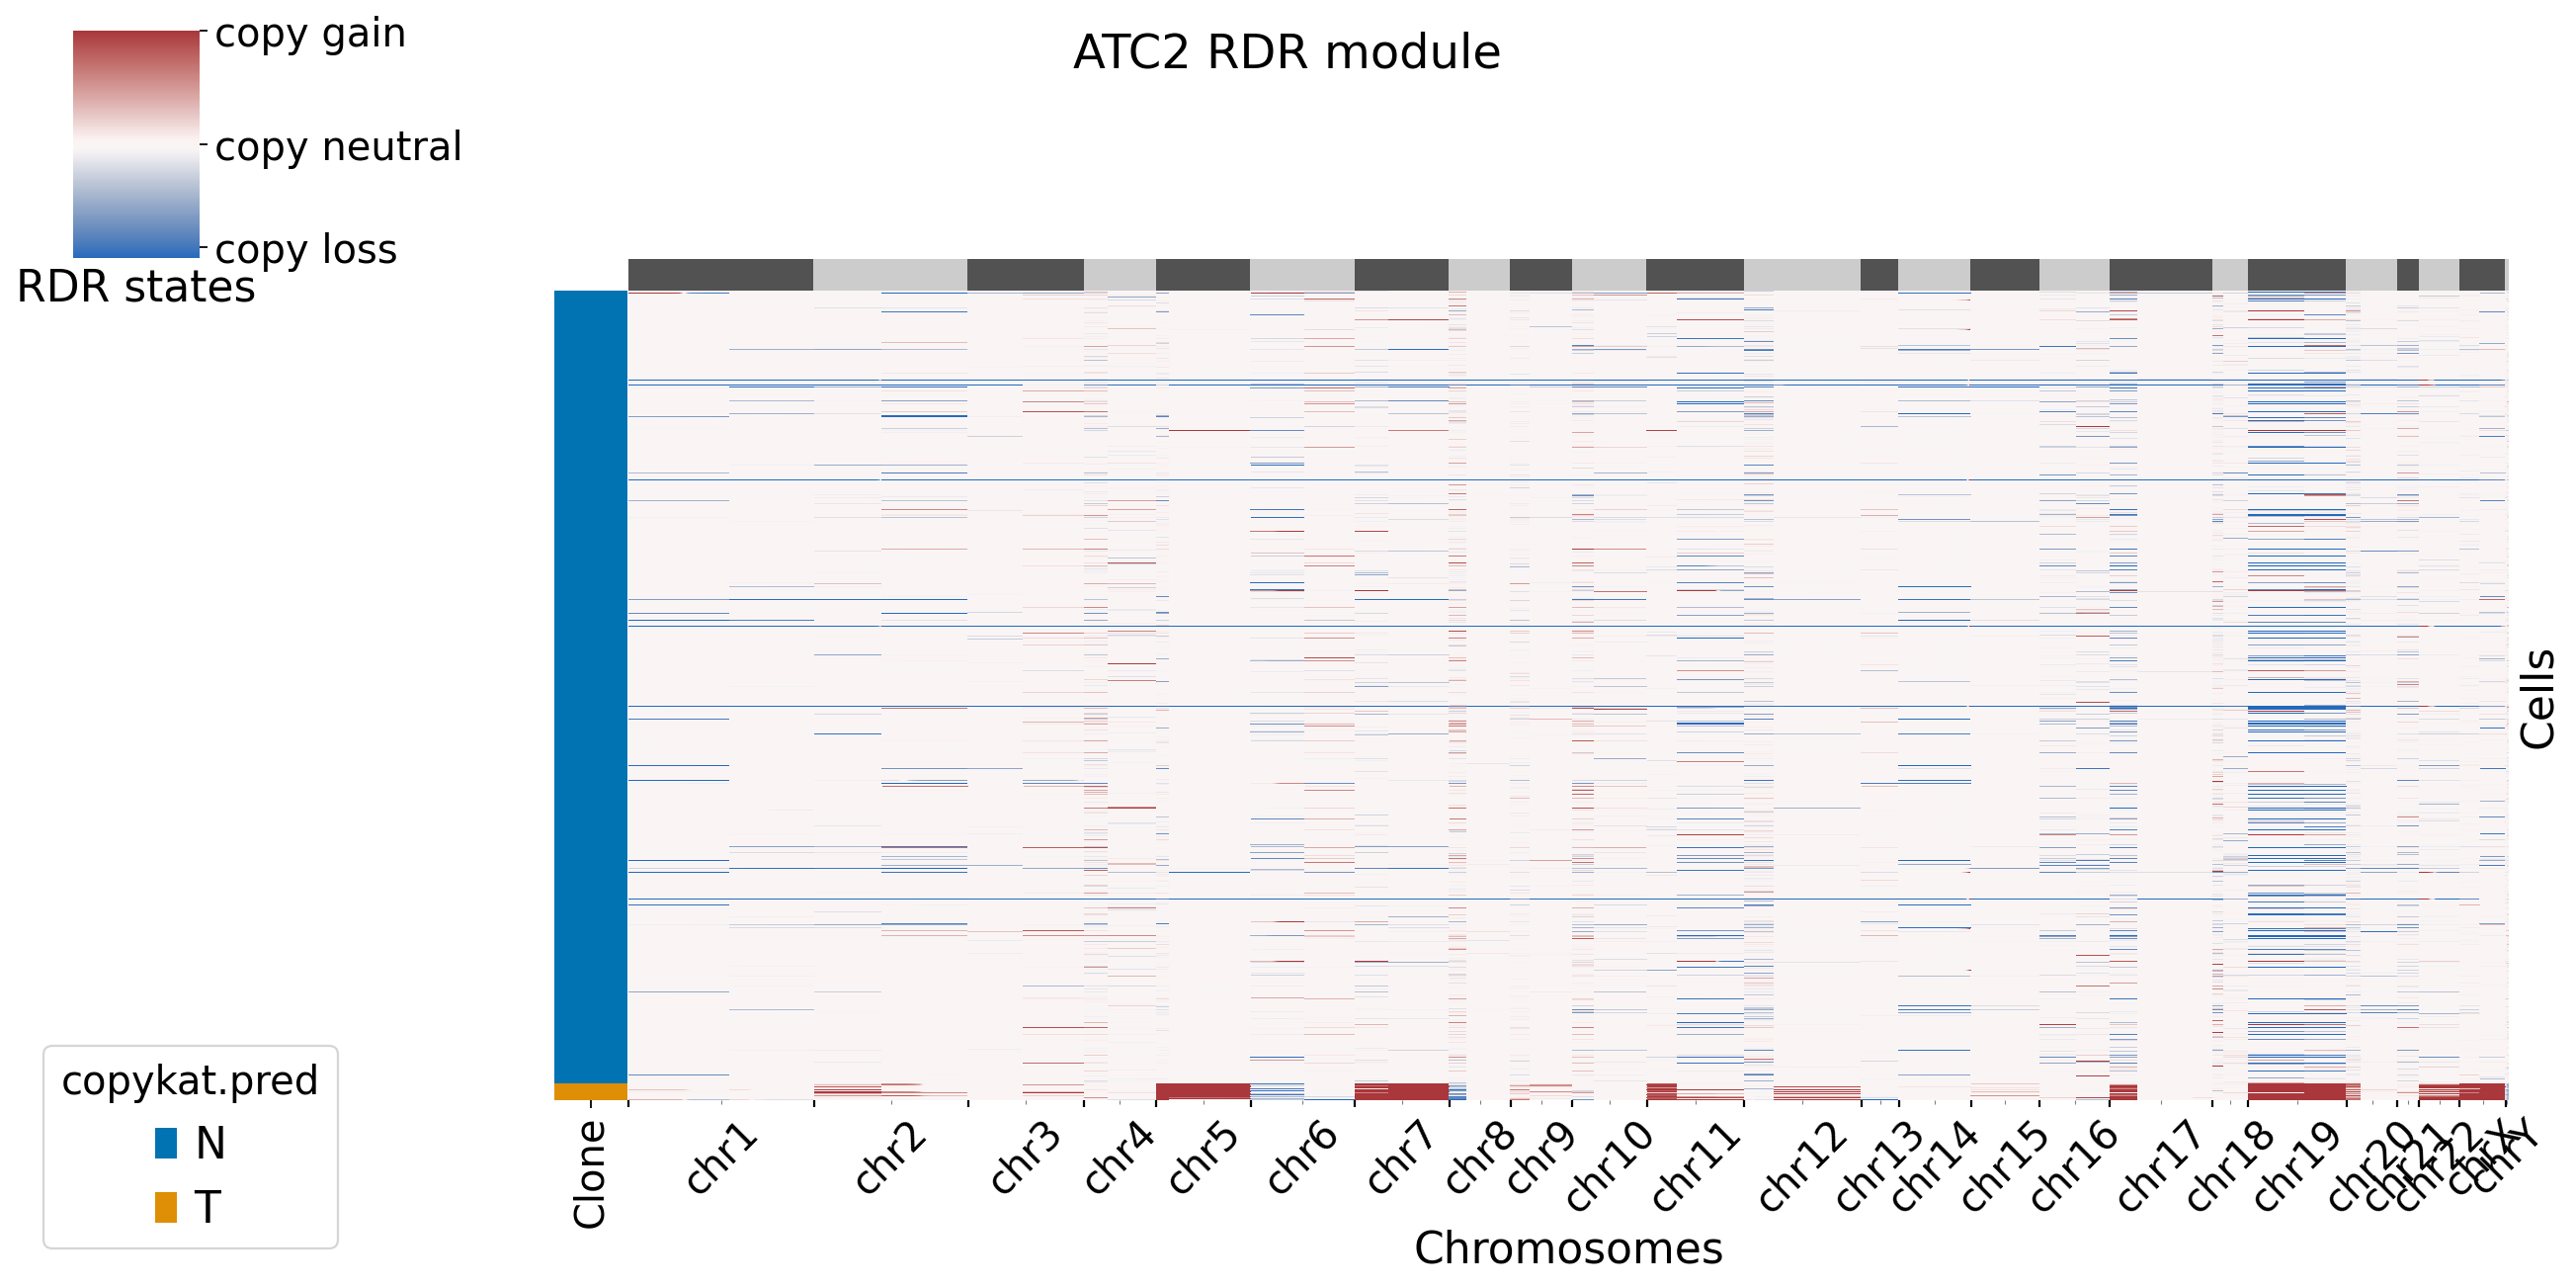

In [11]:
## RDR
xconfig = xclone.XCloneConfig(dataset_name = dataset_name, module = "RDR")
xconfig.set_figure_params(xclone= True, fontsize = 18)
xconfig.outdir = out_dir
xconfig.cell_anno_key = "copykat.pred"
xconfig.ref_celltype = "N"
xconfig.smart_transform = False
xconfig.top_n_marker = 15
xconfig.marker_group_anno_key = "copykat.pred"
xconfig.xclone_plot= True
xconfig.plot_cell_anno_key = "copykat.pred"
xconfig.guide_qt_lst = [1e-04, 0.96, 0.99]
xconfig.fit_GLM_libratio = False
xconfig.exclude_XY = False
xconfig.remove_guide_XY = True


xconfig.display()

RDR_Xdata = xclone.model.run_RDR(RDR_adata,
            config_file = xconfig)


BAF 
Configurations:
BAF_add                        None
BAF_denoise                    True
BAF_denoise_GMM_comp           2
BAF_denoise_GMM_detection      True
BAF_denoise_cellprop_cutoff    0.05
CNV_N_components               5
HMM_brk                        chr_arm
KNN_neighbors                  10
RDR_file                       None
WMA_smooth_key                 chr_arm
WMA_window_size                101
_file_format_data              h5ad
_file_format_figs              pdf
_frameon                       True
_outdir                        /groups/cgsd/rthuang/Results/ATC2/demoresults
_plot_suffix                   
_start                         1691344895.3883576
_vector_friendly               True
baf_bias_mode                  1
bin_nproc                      20
cell_anno_key                  copykat.pred
concentration                  100
concentration_lower            20
concentration_upper            100
dataset_name                   ATC2
exclude_XY                     Fa

... storing 'bin_stop_arm' as categorical
... storing 'bin_stop_chr_arm' as categorical
... storing 'bin_stop_band' as categorical


[XClone hint] BAF_base_file and merged_file saved in /groups/cgsd/rthuang/Results/ATC2/demoresults/data/.
[XClone get_CNV_states] time_used: 140.80seconds
correct BAF CNV guiding copy loss-B ratio
correct BAF CNV guiding copy loss-A ratio
correct BAF CNV guiding copy gain-A ratio
correct BAF CNV guiding copy gain-B ratio
states used: [0.15       0.33333333 0.52061078 0.66666667 0.85      ]
.....
[XClone] specific Center states used.
[XClone]: validated probability, all finite.
cal emm prob time 5 seconds
normalize the input emm_prob_log
normalized emm_prob_log
generate new layer key value: bin_phased_BAF_specific_center_emm_prob_log_KNN
[BAF smoothing] time_used: 1.73seconds
Cell level: no filtering emm_prob
Gene level: no filtering emm_prob
[XClone] multiprocessing for each brk item
nproc: 80
[XClone HMM smoothing] Time used: 18 seconds
[XClone get_CNV_states] time_used: 103.33seconds
states used: [0.3613607  0.52061078 0.63811026]
.....
[XClone] specific Center states used.
[XClone]:

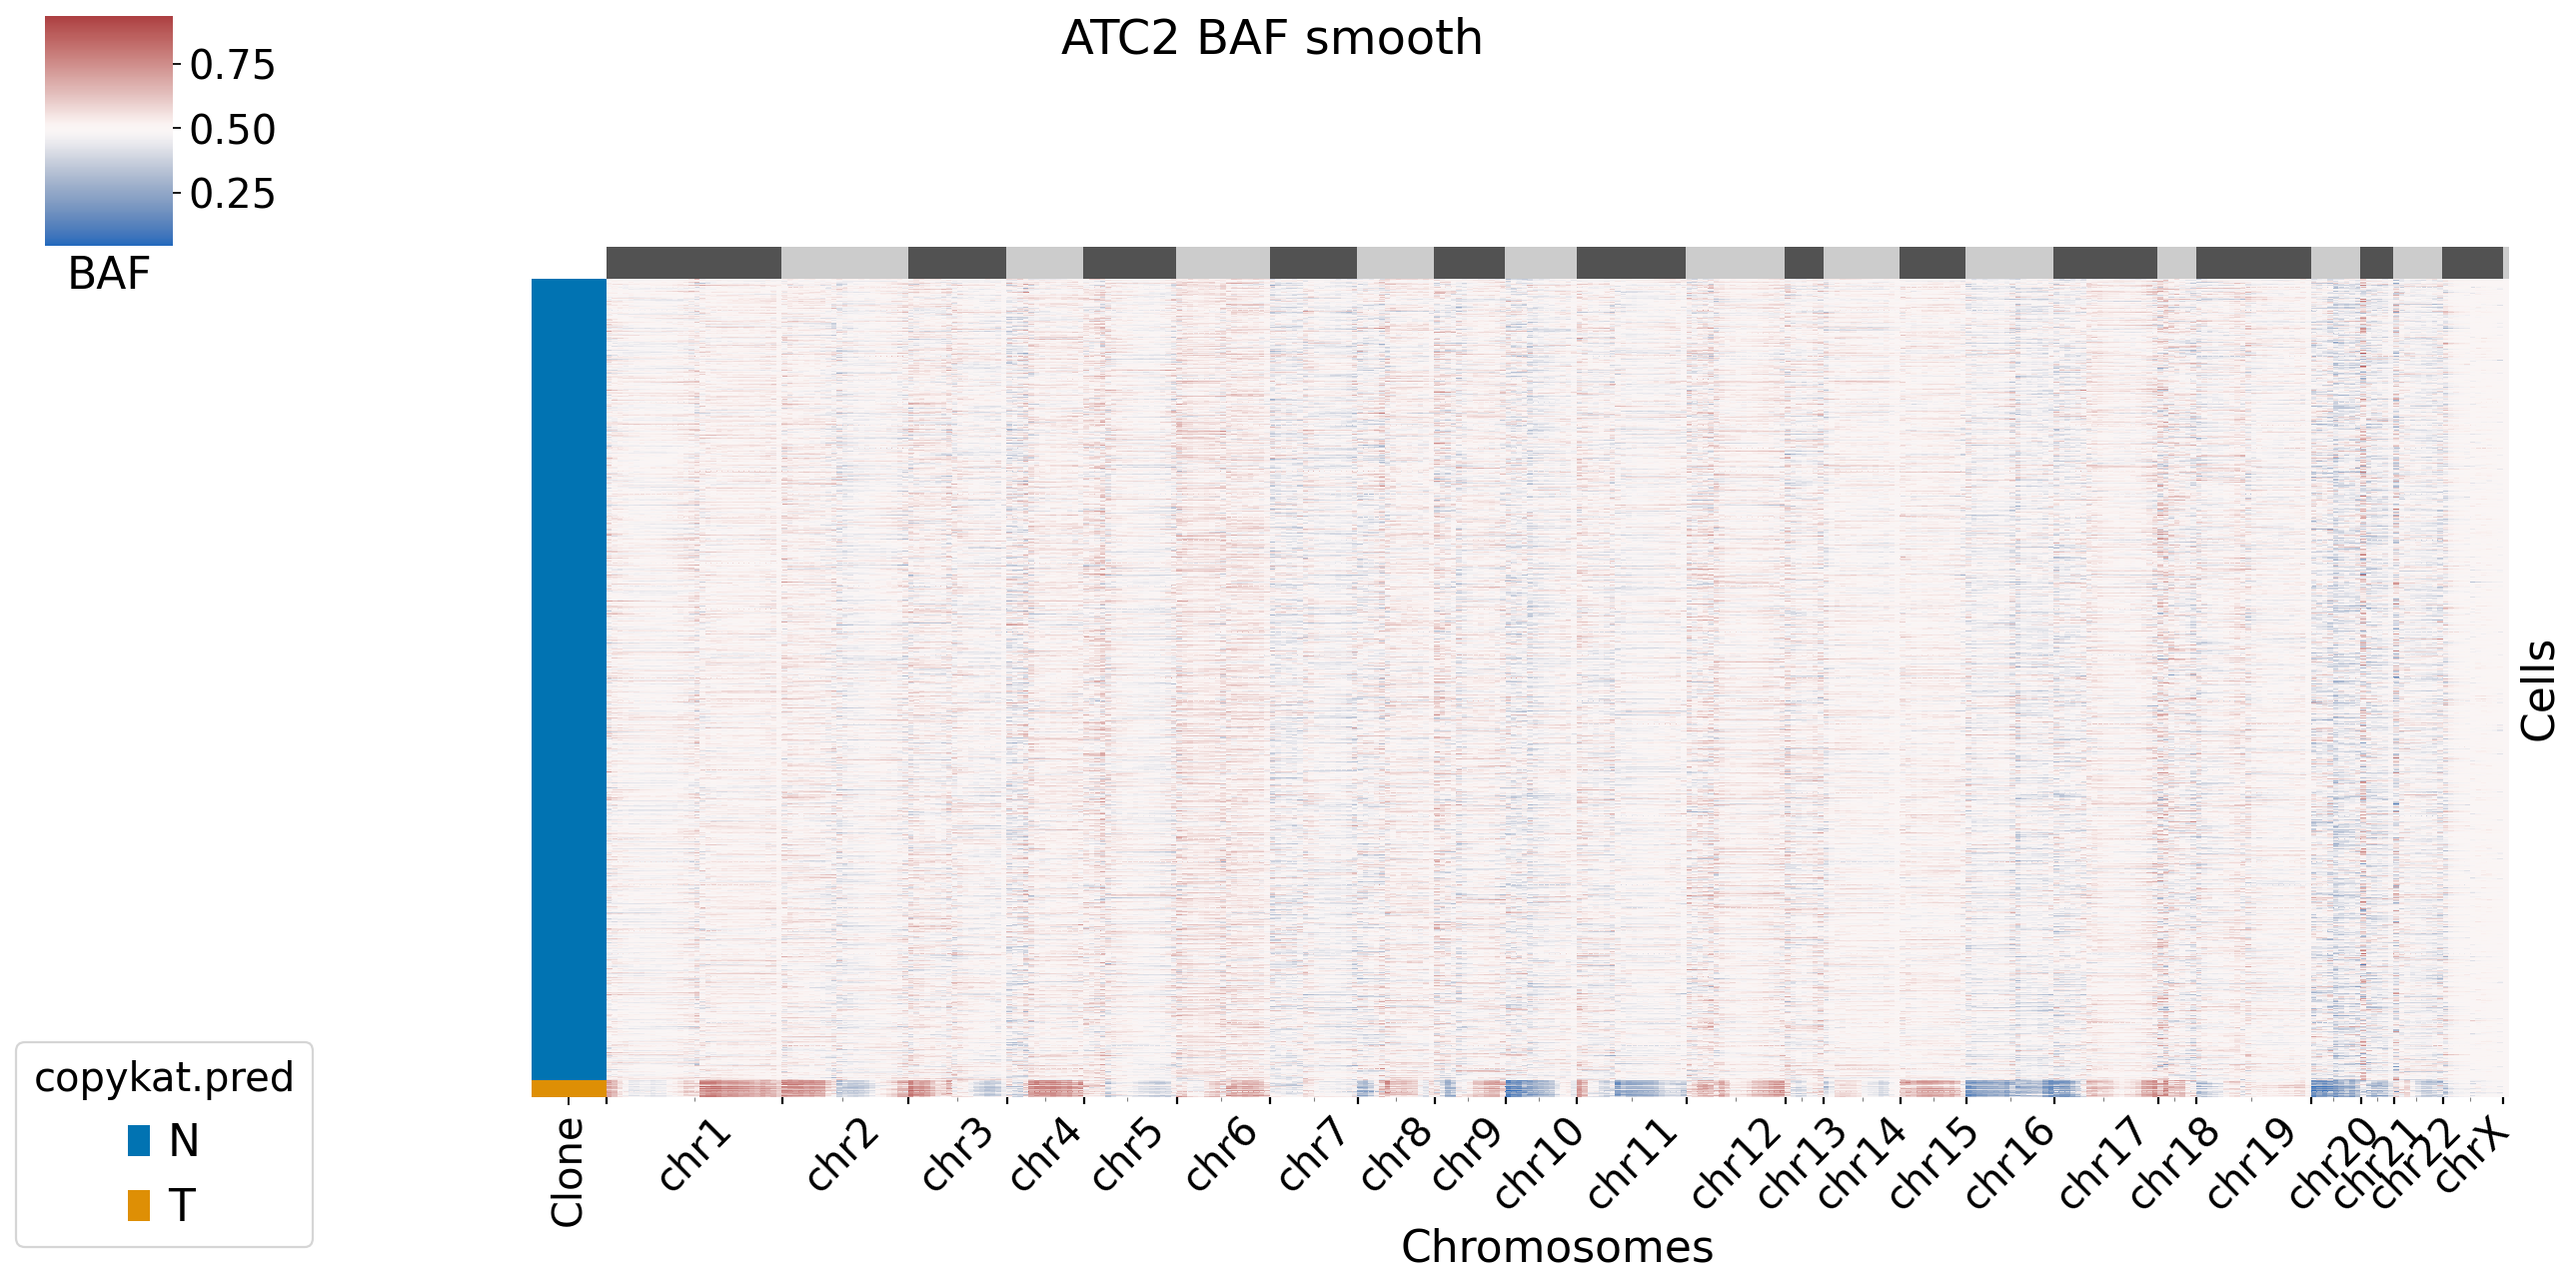

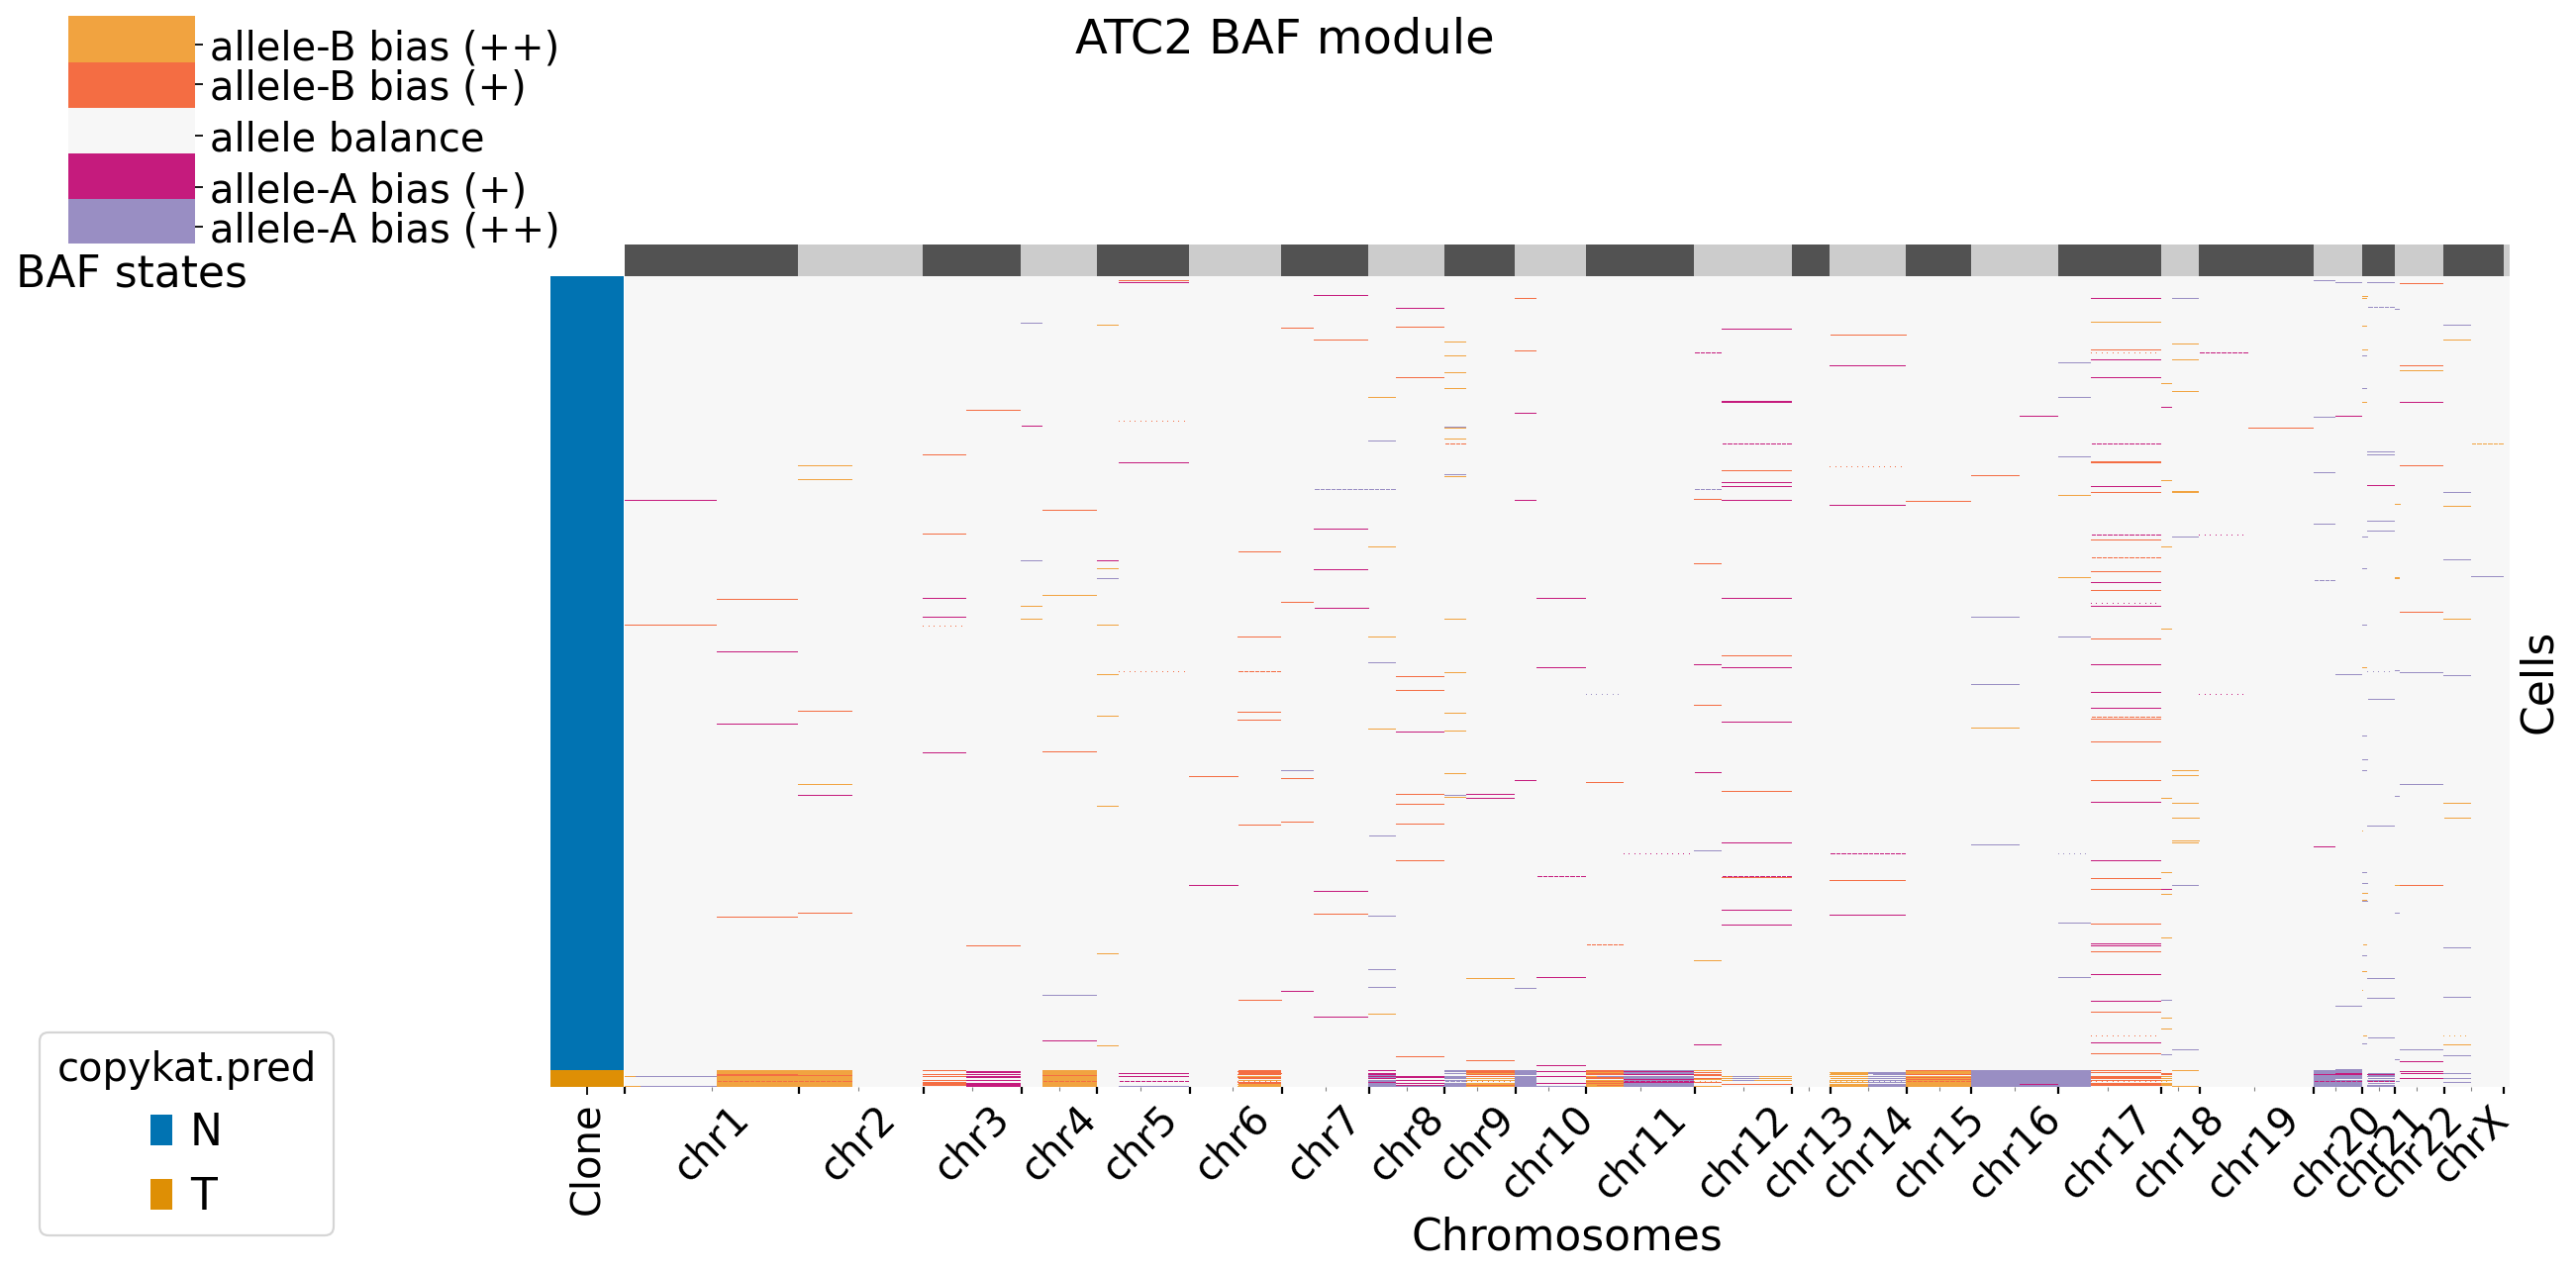

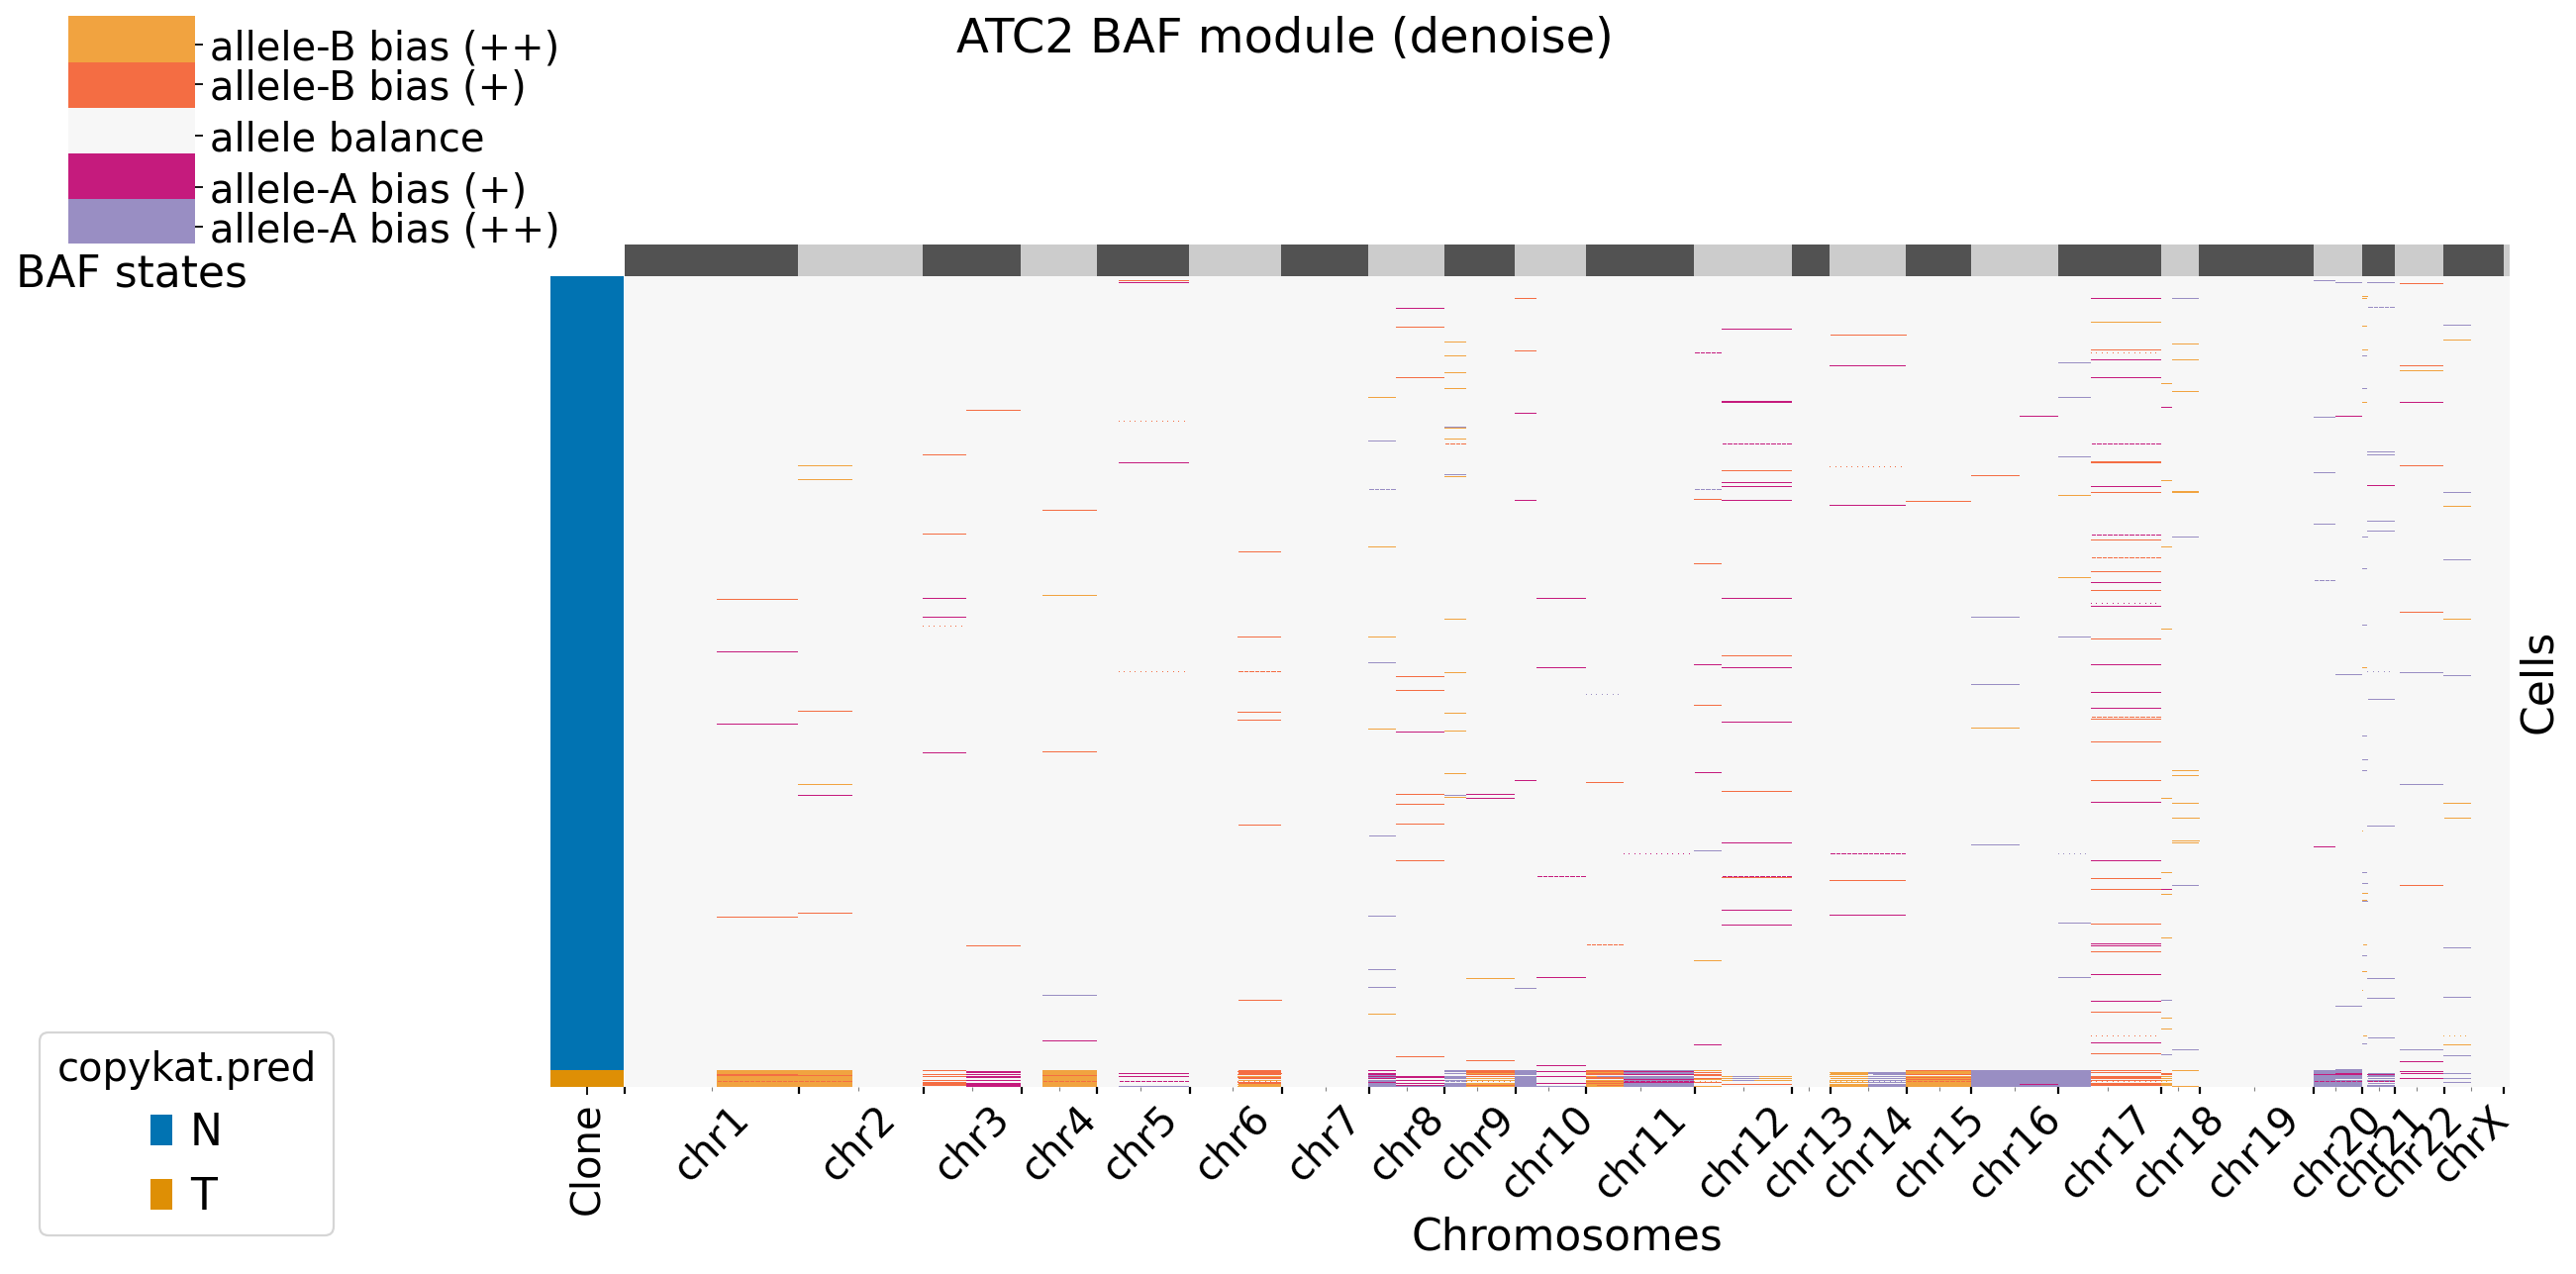

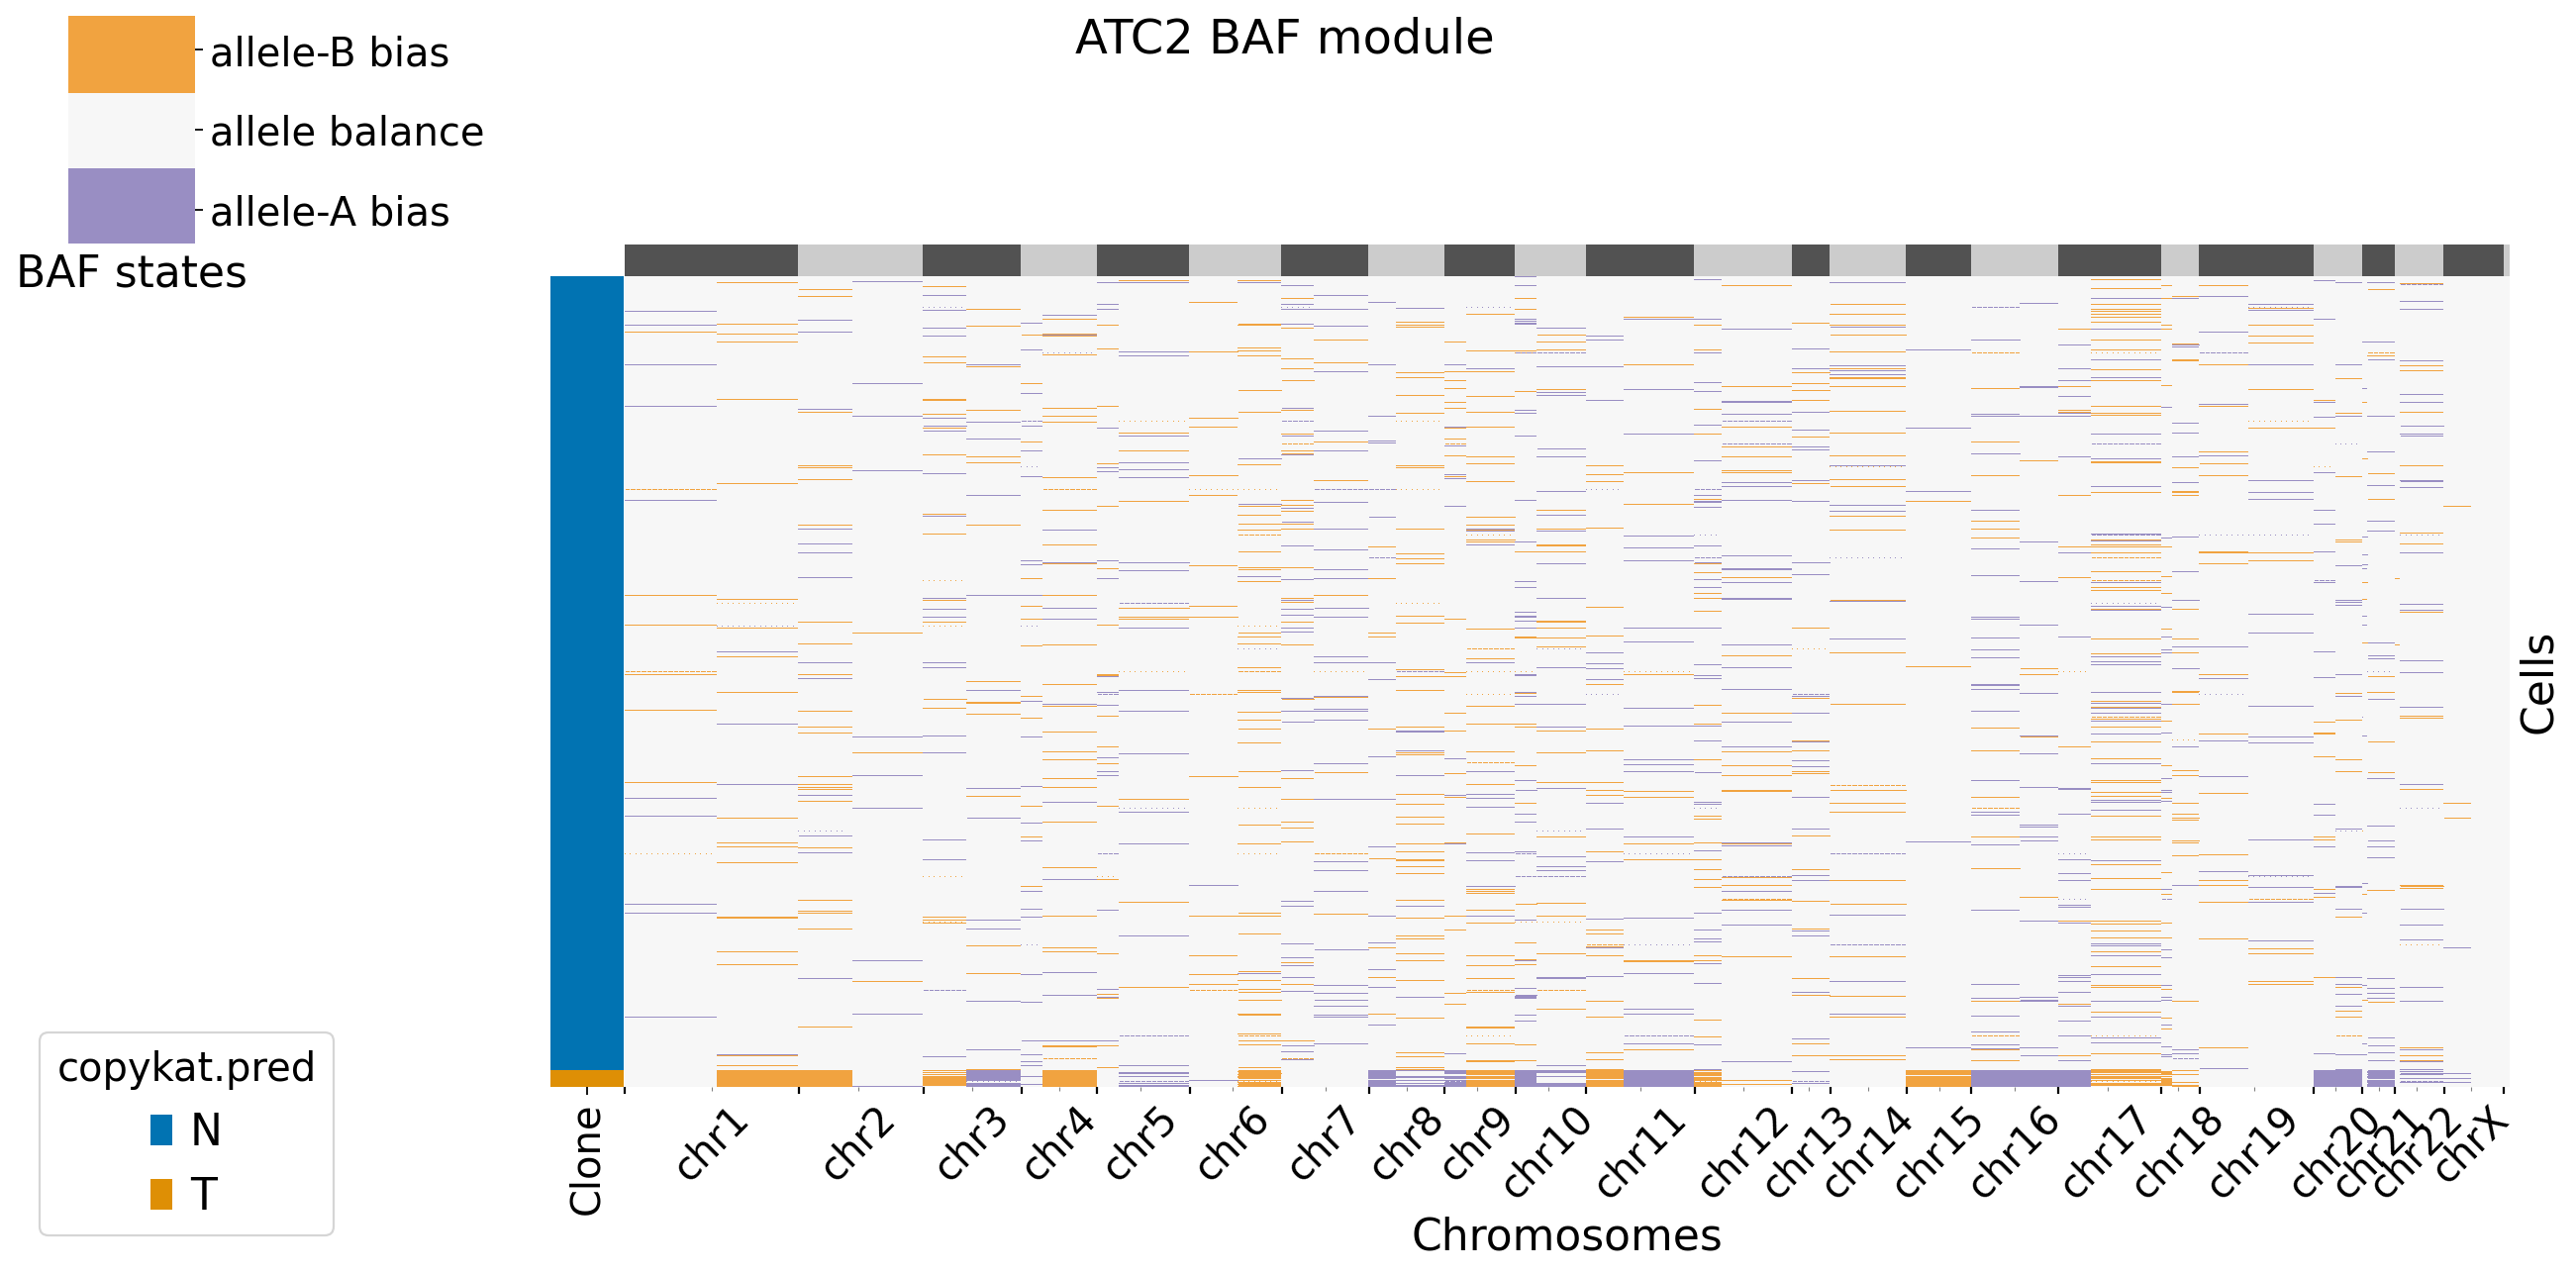

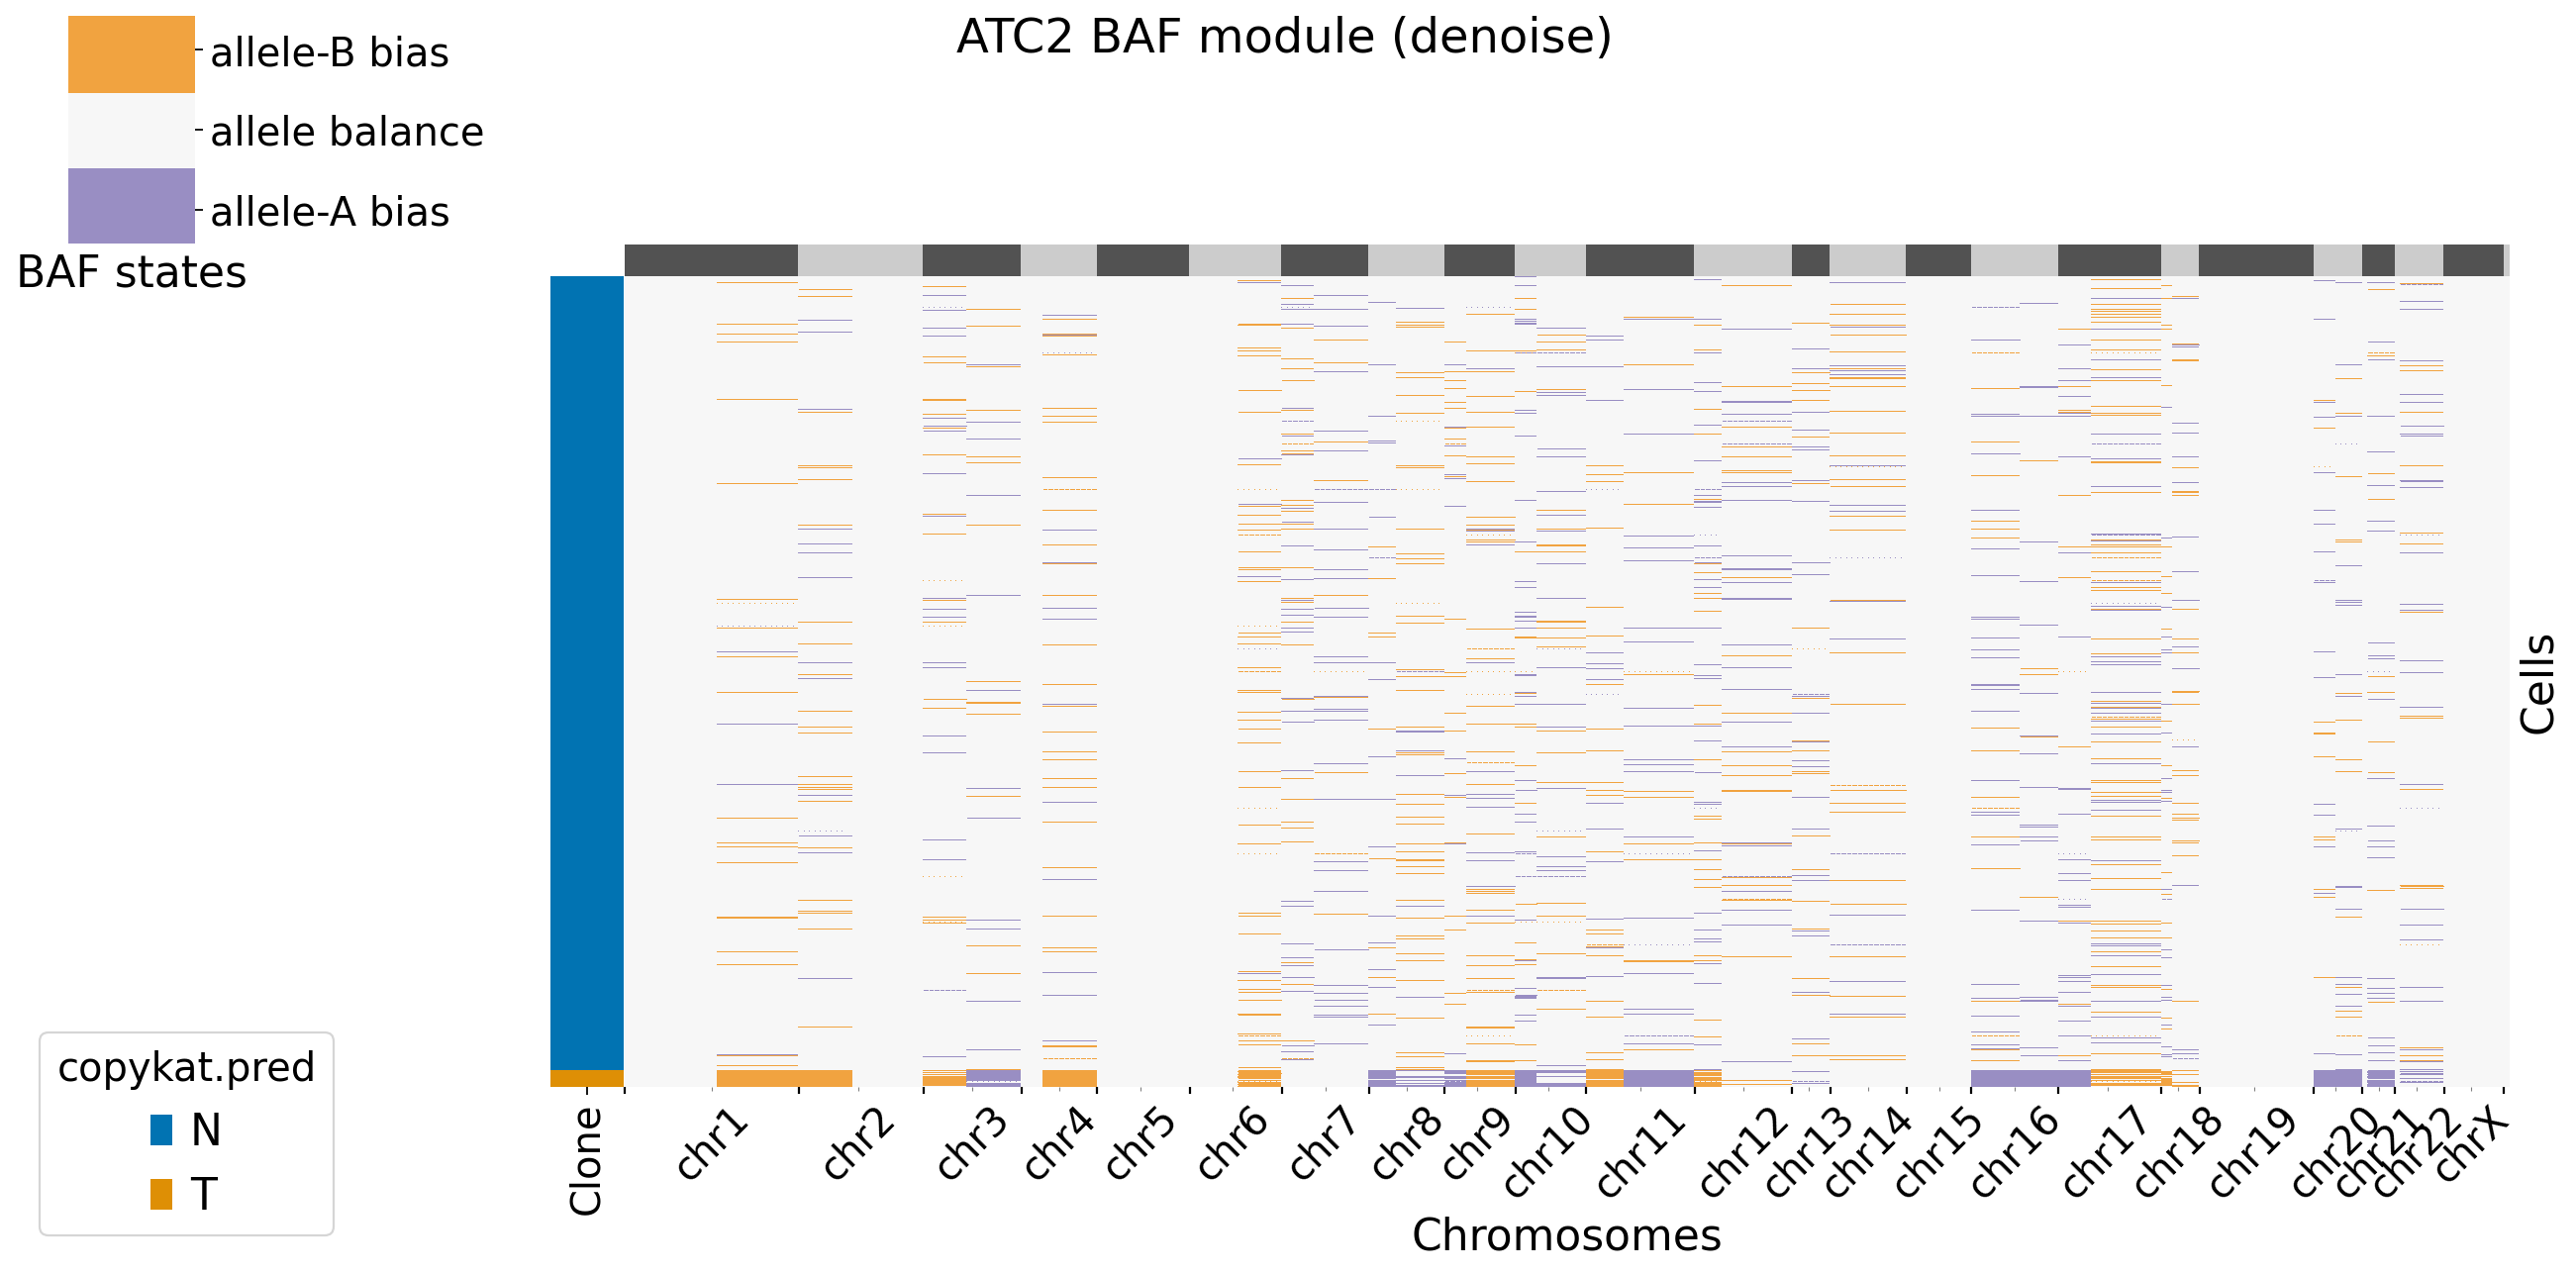

In [14]:
## BAF
xconfig = xclone.XCloneConfig(dataset_name = dataset_name, module = "BAF")
xconfig.set_figure_params(xclone= True, fontsize = 18)
xconfig.outdir = out_dir
xconfig.cell_anno_key = "copykat.pred"
xconfig.ref_celltype = "N"
# xconfig.CNV_N_components = 5 default in baf_bias_mode
xconfig.xclone_plot= True
xconfig.plot_cell_anno_key = "copykat.pred"
xconfig.display()

BAF_merge_Xdata = xclone.model.run_BAF(BAF_adata,
            config_file = xconfig)

Combine 
Configurations:
BAF_denoise                    True
KNN_neighbors                  10
_file_format_data              h5ad
_file_format_figs              pdf
_frameon                       True
_outdir                        /groups/cgsd/rthuang/Results/ATC2/demoresults
_plot_suffix                   
_start                         1691345902.4028945
_vector_friendly               True
cell_anno_key                  copykat.pred
copygain_correct               False
copygain_correct_mode          None
copyloss_correct               True
copyloss_correct_mode          1
dataset_name                   ATC2
exclude_XY                     True
file_format_data               h5ad
file_format_figs               pdf
merge_loh                      True
merge_loss                     True
module                         Combine
outdir                         /groups/cgsd/rthuang/Results/ATC2/demoresults
plot_cell_anno_key             copykat.pred
plot_suffix                    
ref_cellty

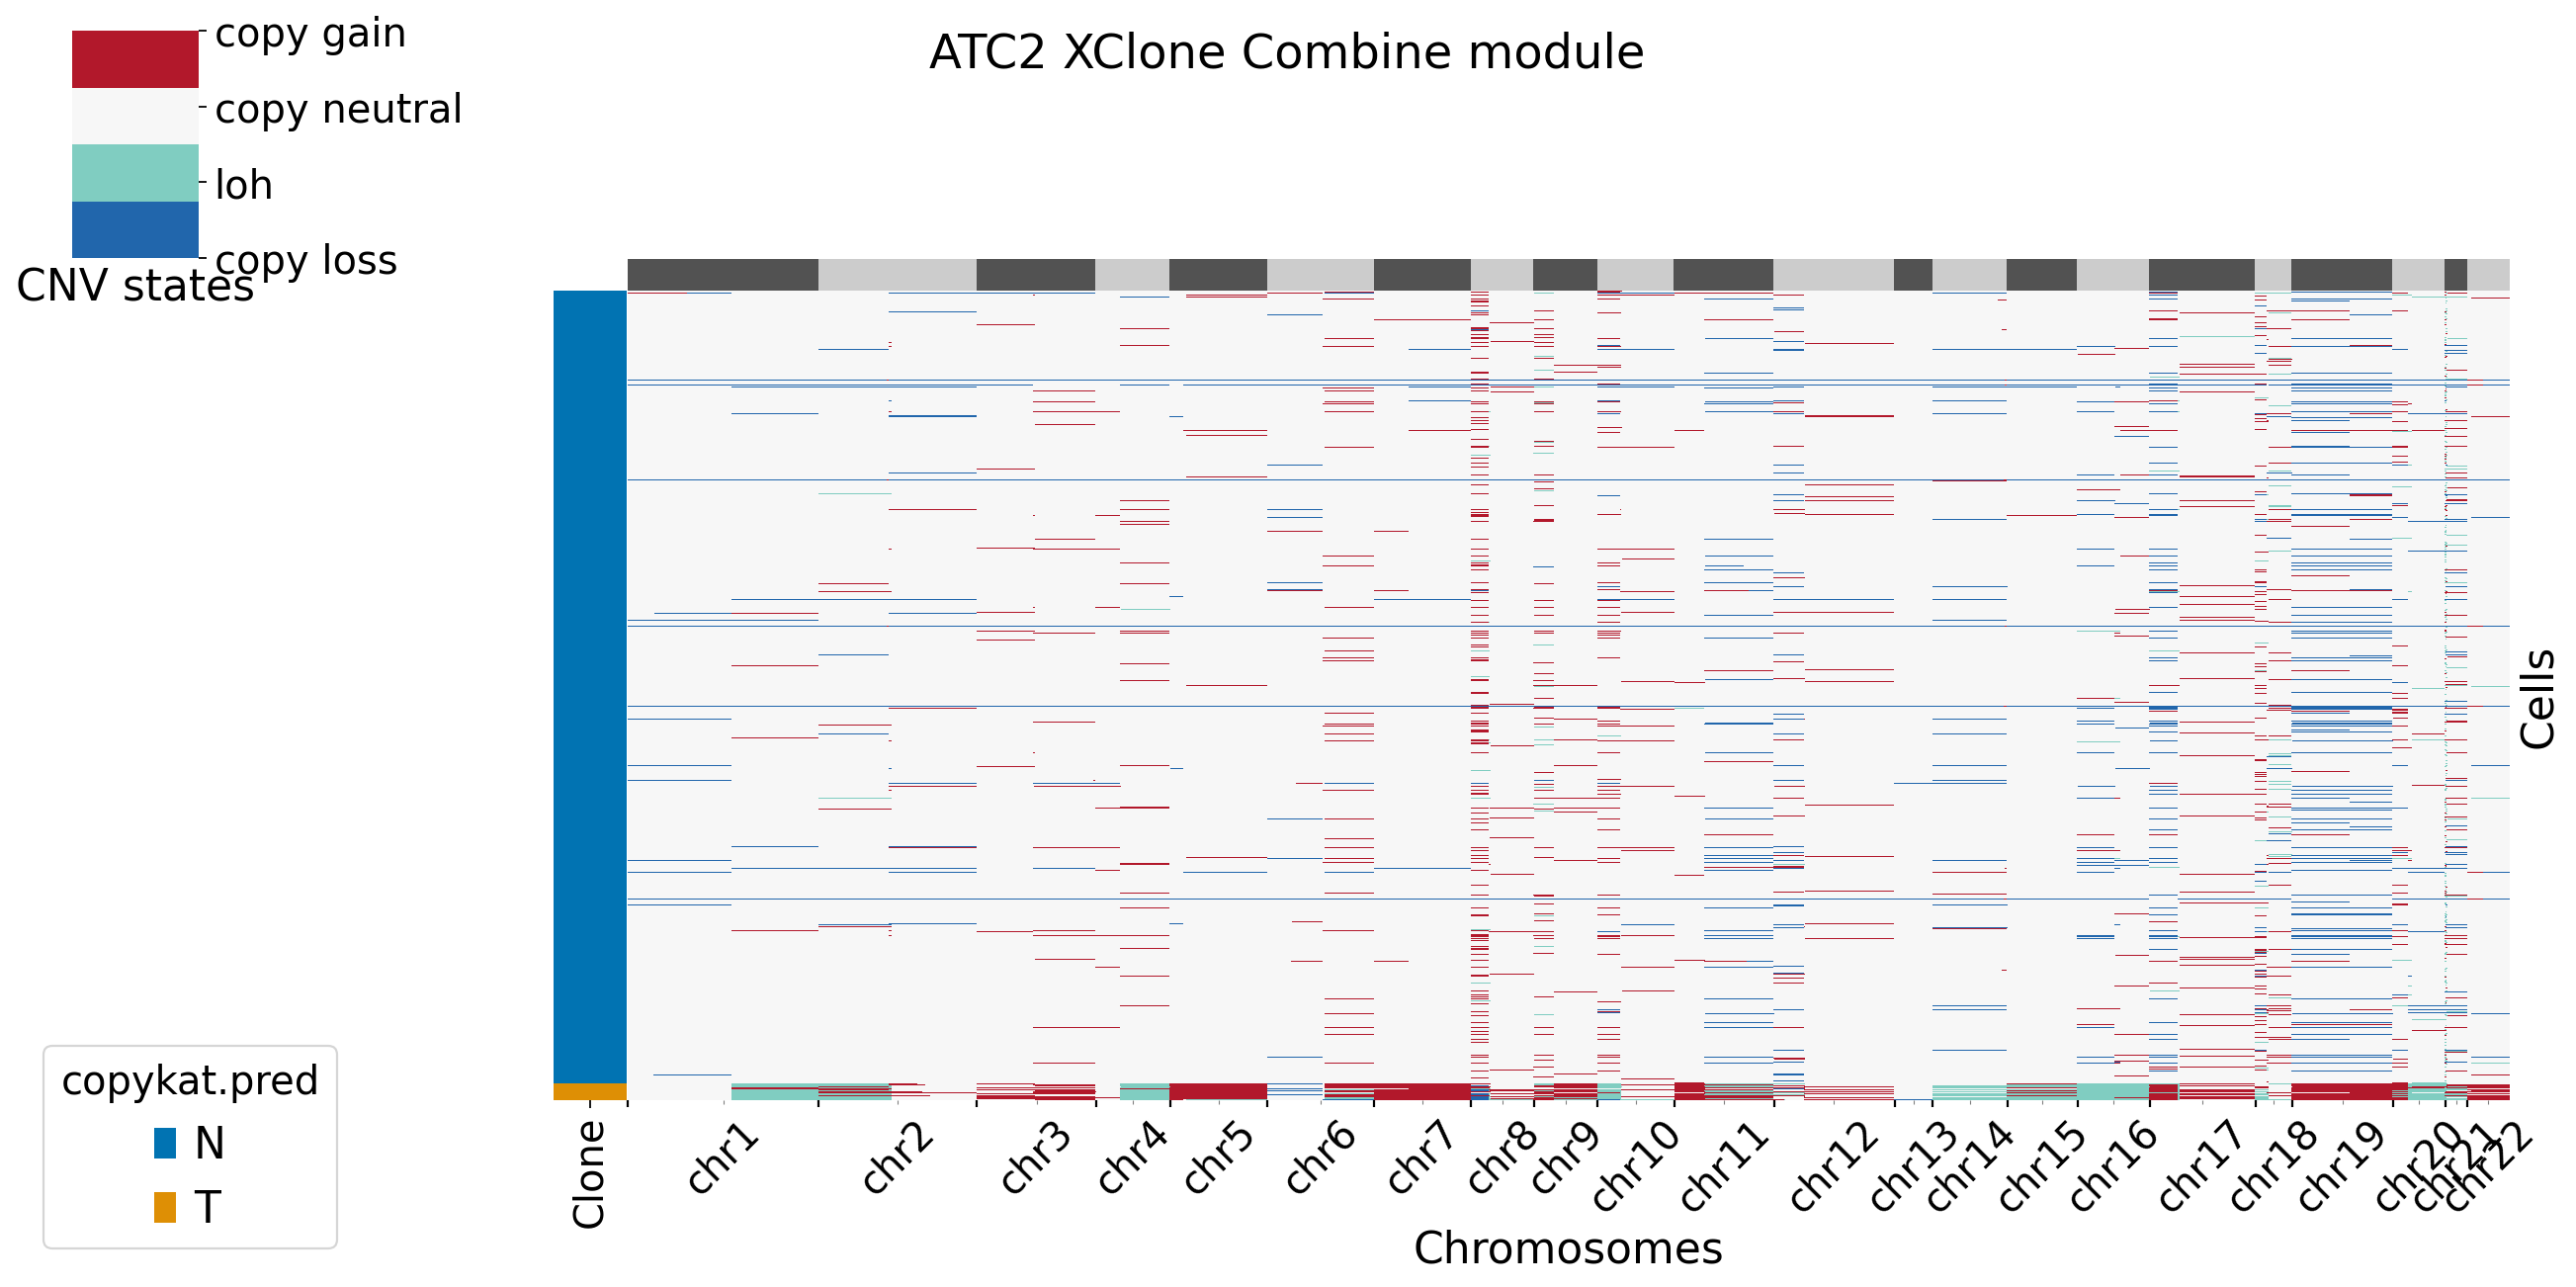

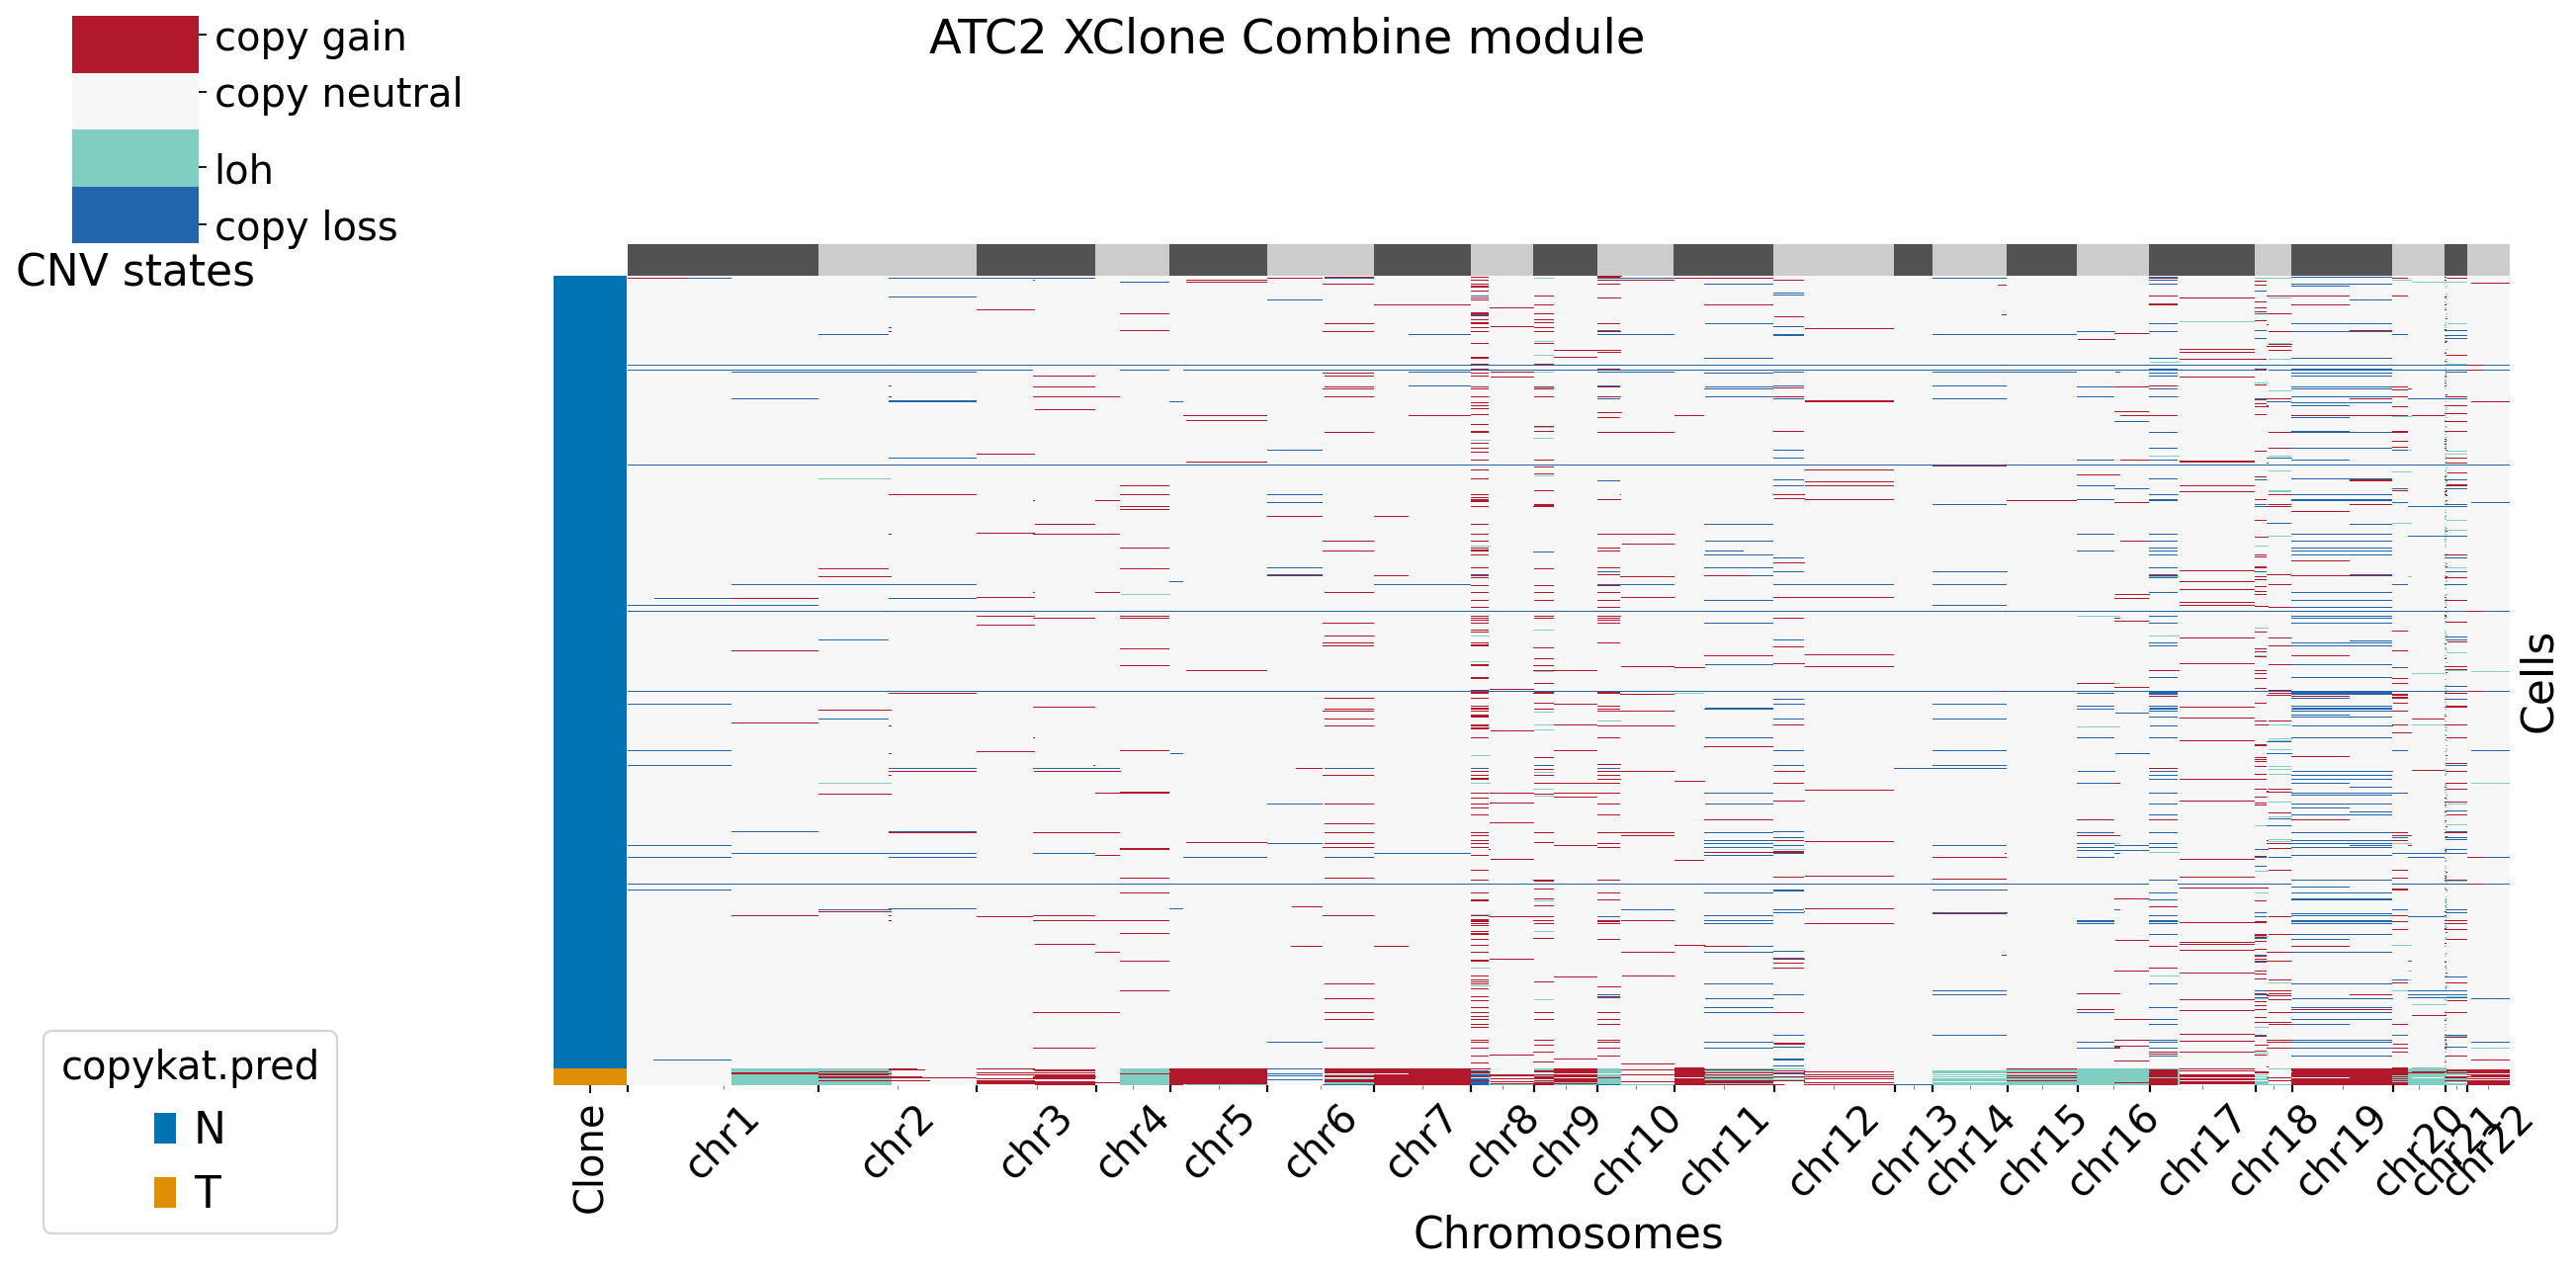

In [15]:
## Combine
xconfig = xclone.XCloneConfig(dataset_name = dataset_name, module = "Combine")
xconfig.set_figure_params(xclone= True, fontsize = 18)
xconfig.outdir = out_dir
xconfig.cell_anno_key = "copykat.pred"
xconfig.ref_celltype = "N"
xconfig.xclone_plot= True
xconfig.plot_cell_anno_key = "copykat.pred"
xconfig.merge_loss = True
xconfig.merge_loh = True
xconfig.BAF_denoise = True
xconfig.exclude_XY = True
xconfig.display()

combine_Xdata = xclone.model.run_combine(RDR_Xdata,
                BAF_merge_Xdata,
                verbose = True,
                run_verbose = True,
                config_file = xconfig)